 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [430]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.


## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [292]:
# Reading whale returns
csvwhale_path = Path("./Resources/whale_returns.csv")
whale_returns = pd.read_csv(csvwhale_path, index_col='Date',parse_dates=True)
whale_returns.sort_values(by='Date',inplace=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [293]:
#count nulls
whale_returns.isnull().mean() * 100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [294]:
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [295]:
#Drop nulls
whale_returns.dropna(inplace=True)

In [296]:
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [297]:
##
whale_returns.describe(include='all')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
count,1059.000000,1059.000000,1059.000000,1059.000000
mean,0.000179,-0.000203,-0.000081,0.000501
std,0.007842,0.006977,0.010824,0.012831
min,-0.032711,-0.032099,-0.139820,-0.066505
25%,-0.003594,-0.003961,-0.004746,-0.005515
50%,0.000467,0.000000,0.000232,0.000617
75%,0.004292,0.003567,0.005176,0.007516
max,0.042977,0.029338,0.080705,0.061341



<h2> Algo Returns</h2>

In [298]:
# Reading algo returns
csvalgo_path  = Path("./Resources/algo_returns.csv")
algo_returns = pd.read_csv(csvalgo_path,index_col='Date', parse_dates=True)
algo_returns.sort_values(by='Date',inplace=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [299]:
#count nulls
algo_returns.isnull().mean() * 100

Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [300]:
## However the column Algo2 has NaN
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [301]:
##
algo_returns.dropna(inplace=True)

In [302]:
##
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [303]:
algo_returns.describe(include='all')

,Algo 1,Algo 2
count,1235.000000,1235.000000
mean,0.000654,0.000341
std,0.007988,0.008466
min,-0.030951,-0.036937
25%,-0.003252,-0.003733
50%,0.000094,0.000581
75%,0.003901,0.005194
max,0.098246,0.083734


In [304]:
csvsp500_path  = Path("./Resources/sp500_history.csv")
sp500_df = pd.read_csv(csvsp500_path, index_col='Date', parse_dates=True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [305]:
sp500_df.describe(include='all')

,Close
count,1649
unique,1639
top,$2066.66
freq,2


In [306]:
sp500_df.count()

Close    1649
dtype: int64

In [307]:
sp500_df.isnull().mean()*100 # has no nulls

Close    0.0
dtype: float64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [308]:
# Reading S&P 500 Closing Prices
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [309]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [310]:
# Fix Data Types
sp500_df['Close']= sp500_df['Close'].str.replace("$", "")
sp500_df.dtypes # as you see its still an object -- let make in a float

Close    object
dtype: object

In [311]:
sp500_df['Close']=sp500_df['Close'].astype("float")
sp500_df.dtypes

Close    float64
dtype: object

In [312]:
sp500_daily_returns = sp500_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [313]:
# Drop nulls
sp500_daily_returns = sp500_df.pct_change().dropna()
sp500_daily_returns.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [314]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.columns=['S&P 500']
sp500_daily_returns.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [315]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_protfolios_returns = pd.concat([whale_returns,algo_returns,sp500_daily_returns], axis='columns',join='inner')
all_protfolios_returns = all_protfolios_returns.sort_index()
all_protfolios_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

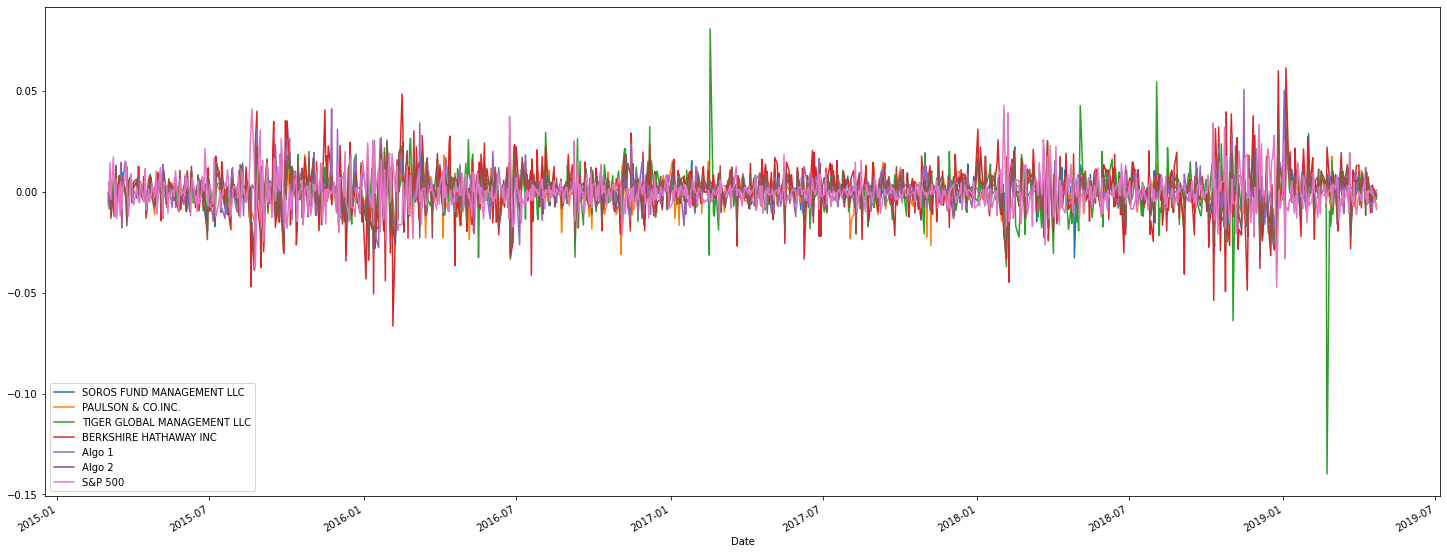

In [316]:
# Plot daily returns of all portfolios
all_protfolios_returns.plot(figsize=(25,10))

#### Calculate and Plot cumulative returns.

In [317]:
# Calculate cumulative returns of all portfolios
all_cumulative_return = (1 + all_protfolios_returns).cumprod()
all_cumulative_return.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,1.004408
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,1.003208
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,1.017632
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,1.013634
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,1.031123


<AxesSubplot:xlabel='Date'>

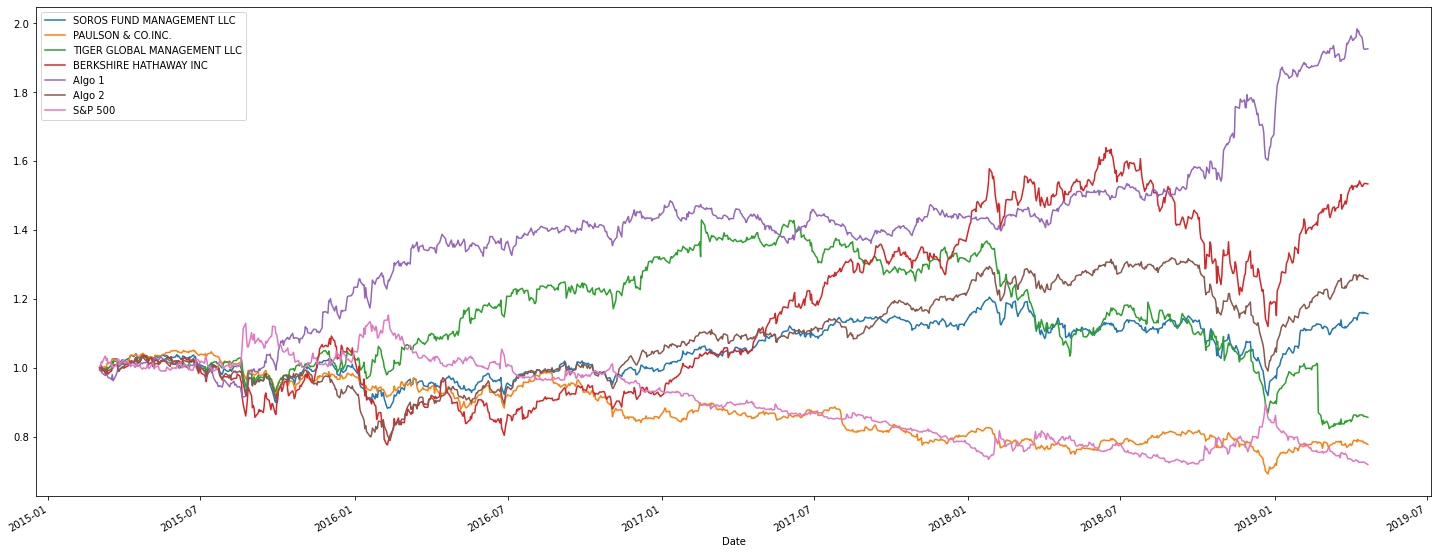

In [318]:
# Plot cumulative returns
all_cumulative_return.plot(figsize=(25,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

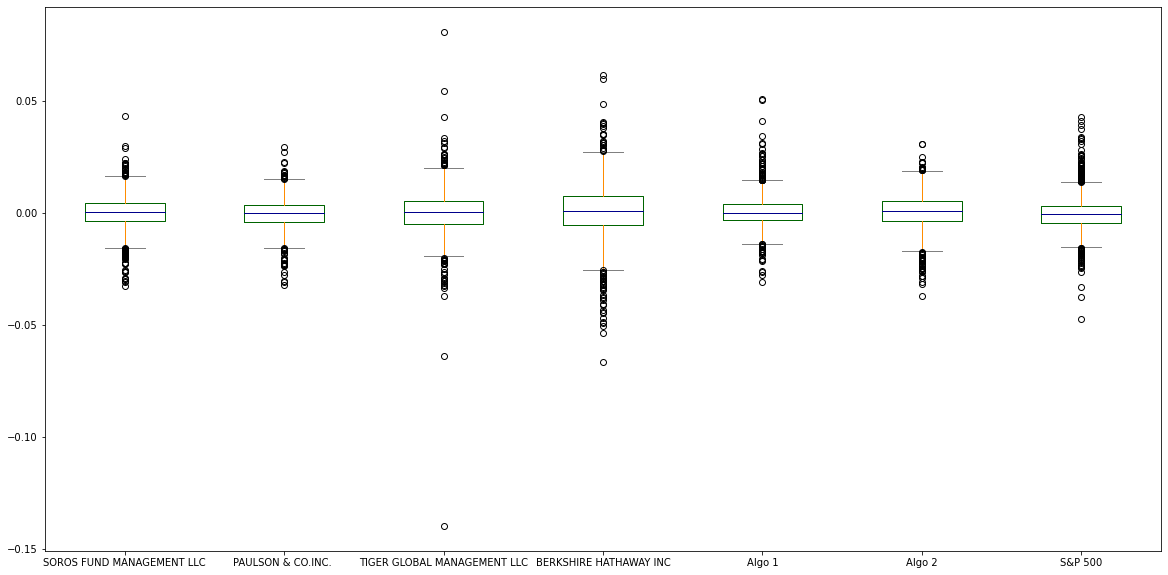

In [319]:
# Box plot to visually show risk

color = {
        "boxes": "DarkGreen",
        "whiskers": "DarkOrange",
       "medians": "DarkBlue",
       "caps": "Gray",
    }
all_protfolios_returns.plot.box(figsize=(20,10),color=color)


### Calculate Standard Deviations

In [320]:
# Calculate the daily standard deviations of all portfolios
all_std_returns = all_protfolios_returns.std()
all_std_returns = all_std_returns.sort_values(ascending=False)
all_std_returns

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
S&P 500                        0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [321]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = sp500_daily_returns.std()
sp500_std.head()
# Determine which portfolios are riskier than the S&P 500
all_riskier_than_sp500 = [all_std_returns > all_std_returns['S&P 500']]
all_riskier_than_sp500

[BERKSHIRE HATHAWAY INC          True
 TIGER GLOBAL MANAGEMENT LLC     True
 S&P 500                        False
 Algo 2                         False
 SOROS FUND MANAGEMENT LLC      False
 Algo 1                         False
 PAULSON & CO.INC.              False
 dtype: bool]

### Calculate the Annualized Standard Deviation

In [322]:
# Calculate the annualized standard deviation (252 trading days)
all_annualized_std = all_std_returns * np.sqrt(252)
all_annualized_std

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
S&P 500                        0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation Portfolios'}, xlabel='Date'>

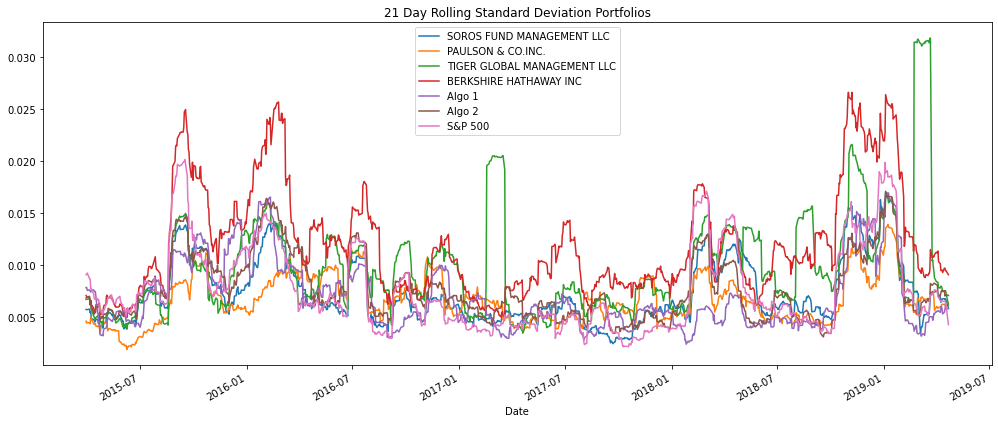

In [323]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_protfolios_returns.rolling(window=21).std().plot(title="21 Day Rolling Standard Deviation Portfolios",figsize=(17,7))

# Plot the rolling standard deviation

<AxesSubplot:xlabel='Date'>

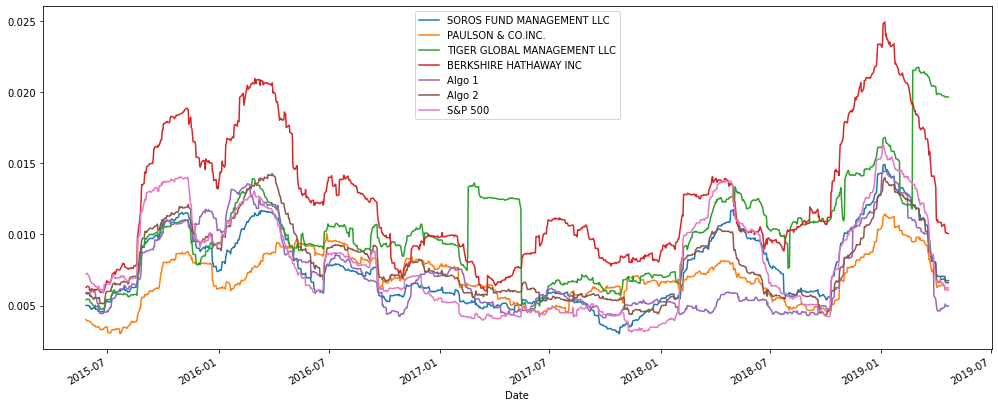

In [324]:
# Calculate the rolling standard deviation for all portfolios using a 60-day window
all_protfolios_returns.rolling(window=60).std().plot(figsize=(17,7))

### Calculate and plot the correlation

In [325]:
# Calculate the correlation
all_correlation = all_protfolios_returns.corr()
all_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


<AxesSubplot:>

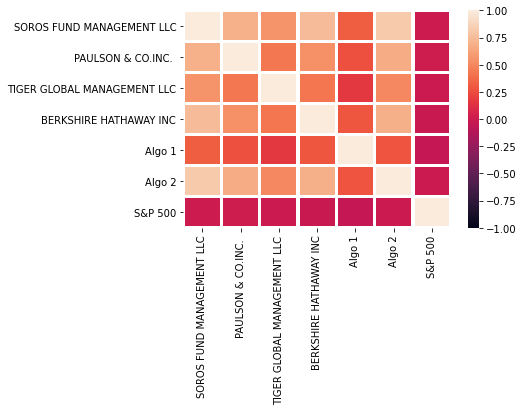

In [326]:
# Display de correlation matrix
sns.heatmap(all_correlation,  vmax=1.0, vmin=-1.0, linewidths=2.5)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [327]:
# Calculate covariance of a single portfolio
paulson_covariance = all_protfolios_returns['PAULSON & CO.INC. '].rolling(window=60).cov(all_protfolios_returns['S&P 500'])
paulson_covariance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15   -0.000002
2019-04-16   -0.000003
2019-04-17   -0.000003
2019-04-18   -0.000003
2019-04-22   -0.000001
Length: 1042, dtype: float64

In [328]:
# Calculate variance of S&P 500
variance = all_protfolios_returns['S&P 500'].rolling(window=60).var()
variance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15    0.000041
2019-04-16    0.000037
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
Name: S&P 500, Length: 1042, dtype: float64

In [329]:
# Computing beta
paulson_beta = paulson_covariance / variance
paulson_beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15   -0.036664
2019-04-16   -0.075420
2019-04-17   -0.078918
2019-04-18   -0.078701
2019-04-22   -0.032284
Length: 1042, dtype: float64

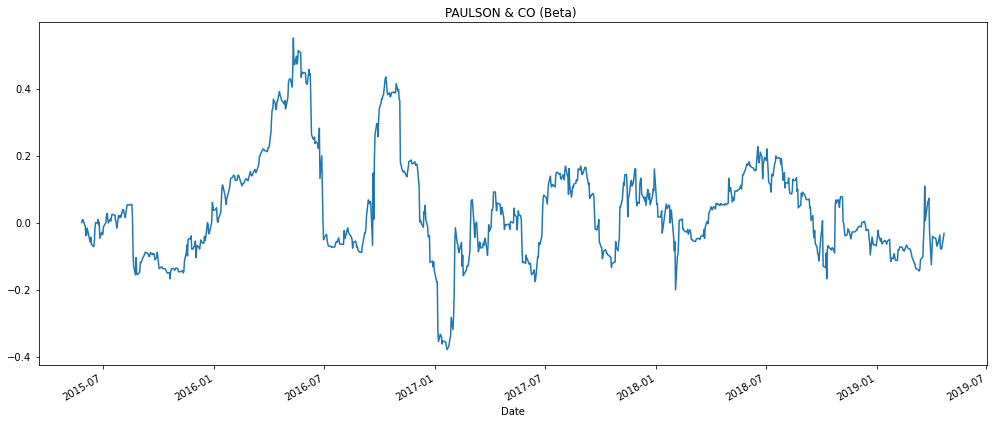

In [330]:
# Plot beta trend
paulson_beta_plot = paulson_beta.plot(title="PAULSON & CO (Beta) ", figsize=(17,7))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

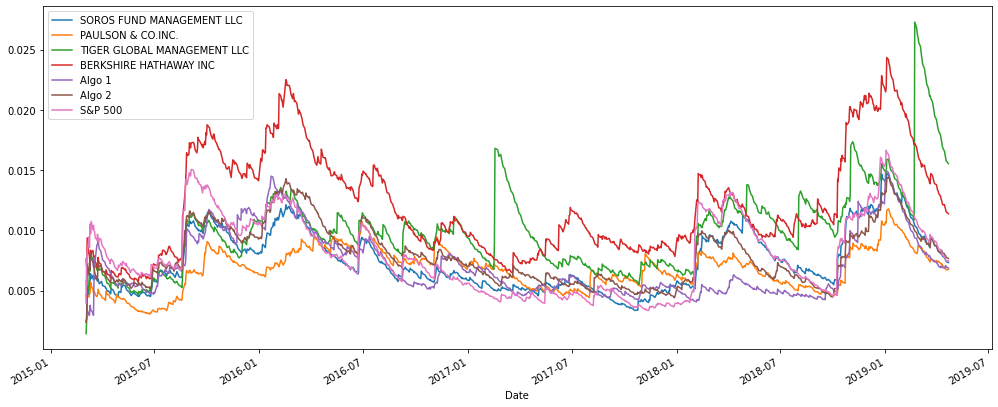

In [331]:
# Use `ewm` to calculate the rolling window
all_rolling_stat_ewma =all_protfolios_returns.ewm(halflife=21).std().plot(figsize=(17,7))
all_rolling_stat_ewma

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [332]:
# Annualized Sharpe Ratios
annualized_Sharp_Ratio = (all_protfolios_returns.mean()* 252 ) / (all_protfolios_returns.std() * np.sqrt(252))
annualized_Sharp_Ratio

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

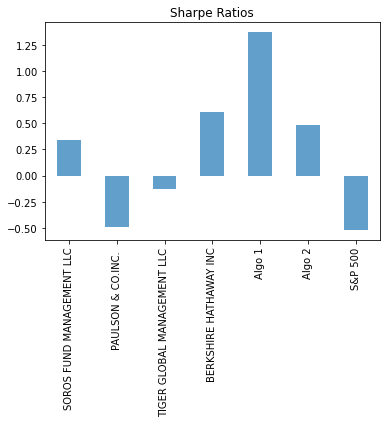

In [333]:
# Visualize the sharpe ratios as a bar plot
annualized_Sharp_Ratio.plot(kind="bar", alpha=0.7,title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

SOROS, BERKSHIRE, Algo 1,Algo 2 all outperform S&P 500. Also Algo 1 has outperformed everyone.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [334]:
# Reading data from 1st stock
goog_hist_stock_csv = Path("Resources/goog_historical.csv")
goog_hist_stock_df = pd.read_csv(goog_hist_stock_csv, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
goog_hist_stock_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [335]:
# Reading data from 2nd stock
aapl_hist_stock_csv = Path("Resources/aapl_historical.csv")
aapl_hist_stock_df = pd.read_csv(aapl_hist_stock_csv, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
aapl_hist_stock_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [336]:
# Reading data from 3rd stock
cost_hist_stock_csv = Path("Resources/cost_historical.csv")
cost_hist_stock_df = pd.read_csv(cost_hist_stock_csv, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
cost_hist_stock_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [380]:
# Combine all stocks in a single DataFrame
combine_stock_portfolio_df = pd.concat([goog_hist_stock_df, aapl_hist_stock_df, cost_hist_stock_df], axis="columns", join="inner")
combine_stock_portfolio_df.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,GOOG,1162.38,AAPL,200.72,COST,243.47
2019-05-08,GOOG,1166.27,AAPL,202.90,COST,241.34
2019-05-07,GOOG,1174.10,AAPL,202.86,COST,240.18
2019-05-06,GOOG,1189.39,AAPL,208.48,COST,244.23
2019-05-03,GOOG,1185.40,AAPL,211.75,COST,244.62


In [381]:
# Reset Date index
combine_stock_portfolio_df.sort_index(inplace=True)
combine_stock_portfolio_df.head(5)

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-05-11,GOOG,1098.26,AAPL,188.59,COST,195.76
2018-05-14,GOOG,1100.20,AAPL,188.15,COST,195.88
2018-05-15,GOOG,1079.23,AAPL,186.44,COST,195.48
2018-05-16,GOOG,1081.77,AAPL,188.18,COST,198.71
2018-05-17,GOOG,1078.59,AAPL,186.99,COST,199.60


In [382]:
# Reorganize portfolio data by having a column per symbol
combine_stock_portfolio_df.columns=['drop1','GOOG','drop2','AAPLE','drop3','COST']
combine_stock_portfolio_df.head()

,drop1,GOOG,drop2,AAPLE,drop3,COST
Trade DATE,,,,,,
2018-05-11,GOOG,1098.26,AAPL,188.59,COST,195.76
2018-05-14,GOOG,1100.20,AAPL,188.15,COST,195.88
2018-05-15,GOOG,1079.23,AAPL,186.44,COST,195.48
2018-05-16,GOOG,1081.77,AAPL,188.18,COST,198.71
2018-05-17,GOOG,1078.59,AAPL,186.99,COST,199.60


In [383]:
#drop columns
combine_stock_portfolio_df.drop(columns=['drop1','drop2','drop3'],inplace=True)
combine_stock_portfolio_df.head()

,GOOG,AAPLE,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [384]:
# Calculate daily returns
combine_portfolio_returns = combine_stock_portfolio_df.pct_change()
combine_portfolio_returns.head()

,GOOG,AAPLE,COST
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479


In [385]:
# Drop NAs
combine_portfolio_returns.dropna(inplace=True)
# Display sample data
combine_portfolio_returns.head()

,GOOG,AAPLE,COST
Trade DATE,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206


In [386]:
# rename index name
combine_portfolio_returns.index.rename('Date',inplace=True)
combine_portfolio_returns.head()


,GOOG,AAPLE,COST
Date,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [387]:
# Set weights
weights = [1/3, 1/3, 1/3]

In [388]:
# Calculate portfolio return
portfolio_weight_returns = combine_portfolio_returns.dot(weights)
portfolio_weight_returns =portfolio_weight_returns.rename("Custom")
# Display sample data
portfolio_weight_returns.head()

Date
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
Name: Custom, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [393]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolios_returns_2 = pd.concat([whale_returns,algo_returns,sp500_daily_returns,portfolio_weight_returns], axis='columns',join='inner')
all_portfolios_returns_2.sort_values(by='Date',inplace=True)

all_portfolios_returns_2.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333,-0.006061


In [394]:
#Check the null na
all_portfolios_returns_2.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
Custom                         0
dtype: int64

In [392]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolios_returns_2.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
Custom                         0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [397]:
# Calculate the annualized `std`
annualized_std = all_portfolios_returns_2.std()
annualized_std

SOROS FUND MANAGEMENT LLC      0.009248
PAULSON & CO.INC.              0.007366
TIGER GLOBAL MANAGEMENT LLC    0.014671
BERKSHIRE HATHAWAY INC         0.015579
Algo 1                         0.008437
Algo 2                         0.008788
S&P 500                        0.009605
Custom                         0.013331
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

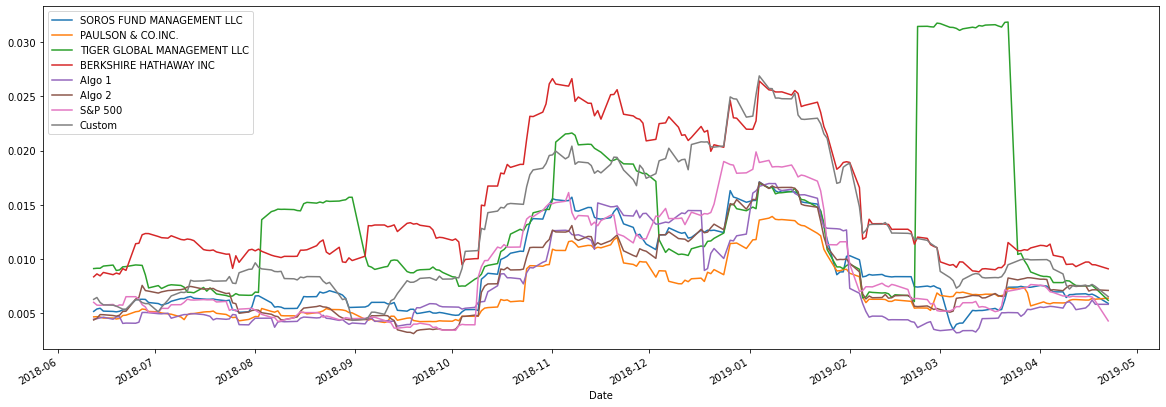

In [436]:
# Calculate rolling standard deviation
all_portfolios_returns_2.rolling(window=21).std().plot(figsize=(20,7))
# Plot rolling standard deviation

### Calculate and plot the correlation

In [407]:
# Calculate and plot the correlation
all_portfolios_returns_2.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.791802,0.477844,0.816197,0.336909,0.862583,-0.028256,0.732548
PAULSON & CO.INC.,0.791802,1.000000,0.484869,0.650390,0.360727,0.783865,-0.059862,0.643828
TIGER GLOBAL MANAGEMENT LLC,0.477844,0.484869,1.000000,0.324306,0.113671,0.408402,0.005881,0.390961
BERKSHIRE HATHAWAY INC,0.816197,0.650390,0.324306,1.000000,0.325985,0.782054,-0.038832,0.800558
Algo 1,0.336909,0.360727,0.113671,0.325985,1.000000,0.364457,-0.054478,0.260331
Algo 2,0.862583,0.783865,0.408402,0.782054,0.364457,1.000000,-0.042540,0.739020
S&P 500,-0.028256,-0.059862,0.005881,-0.038832,-0.054478,-0.042540,1.000000,0.005603
Custom,0.732548,0.643828,0.390961,0.800558,0.260331,0.739020,0.005603,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [410]:
# Calculate and plot Beta
custom_cov = all_portfolios_returns_2['Custom'].rolling(window=60).cov(all_portfolios_returns_2['S&P 500'])
custom_cov

Date
2018-05-14             NaN
2018-05-15             NaN
2018-05-16             NaN
2018-05-17             NaN
2018-05-18             NaN
                  ...     
2019-04-15    2.359313e-06
2019-04-16    8.261192e-07
2019-04-17    6.125529e-07
2019-04-18    5.990182e-07
2019-04-22   -2.201289e-07
Length: 236, dtype: float64

In [412]:
##
custom_var = all_portfolios_returns_2['S&P 500'].rolling(window=60).var()
custom_var

<AxesSubplot:title={'center':'Custom Beta'}, xlabel='Date'>

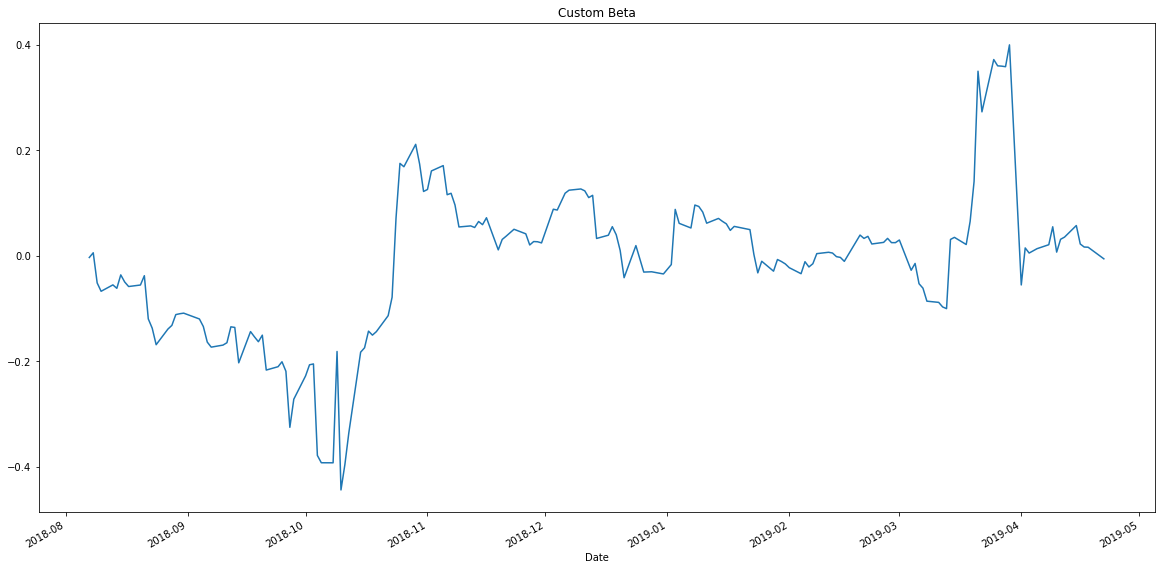

In [413]:
##
custom_beta = custom_cov/custom_var
custom_beta.plot(title="Custom Beta", figsize=(20,10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [417]:
# Calculate Annualzied Sharpe Ratios
all_portfolios_ratio = (all_portfolios_returns_2.mean()* 252) / (all_portfolios_returns_2.std() * np.sqrt(252))
all_portfolios_ratio.sort_values(ascending=False)

Algo 1                         2.001260
Custom                         0.876152
SOROS FUND MANAGEMENT LLC      0.380007
PAULSON & CO.INC.              0.227577
BERKSHIRE HATHAWAY INC         0.103006
Algo 2                         0.007334
S&P 500                       -0.427676
TIGER GLOBAL MANAGEMENT LLC   -1.066635
dtype: float64

<AxesSubplot:title={'center':'Sharp Ratios'}>

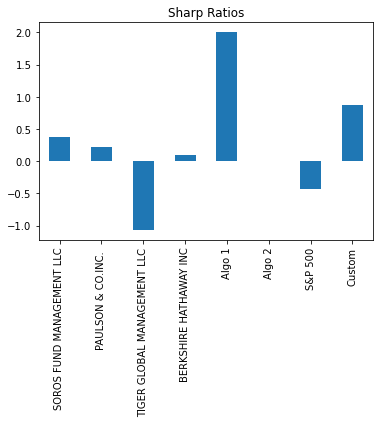

In [420]:
# Visualize the sharpe ratios as a bar plot
all_portfolios_ratio.plot(kind="bar",title="Sharp Ratios")

<AxesSubplot:ylabel='Density'>

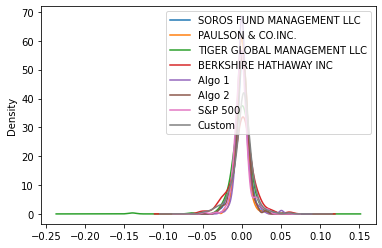

In [435]:
##
all_portfolios_returns_2.plot.density()

### How does your portfolio do?

Write your answer here!